In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from datetime import datetime

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [68]:
#read data
df = pd.read_csv(r'C:\Users\I539797\Documents\Thesis\Datasets\Formatted Datasets\formatted_london.csv')#, parse_dates=[0], squeeze=True, date_parser=parser)
df.head()

,Date,NumericIndex,OriginMovementID,DestinationMovementID,MeanTravelTimeSeconds,RangeLowerBoundTravelTimeSeconds,RangeUpperBoundTravelTimeSeconds,DayOfWeek
0,2016-01-02,1092025,573,982,970,709,1325,Saturday
1,2016-01-02,1091680,573,318,1201,966,1492,Saturday
2,2016-01-02,1091681,573,319,1525,1141,2037,Saturday
3,2016-01-02,1091682,573,320,1116,824,1511,Saturday
4,2016-01-02,1091683,573,321,1075,853,1354,Saturday


In [69]:
df.rename(columns={'Date':'ds', 'MeanTravelTimeSeconds':'y'}, inplace=True)
df.head()

,ds,NumericIndex,OriginMovementID,DestinationMovementID,y,RangeLowerBoundTravelTimeSeconds,RangeUpperBoundTravelTimeSeconds,DayOfWeek
0,2016-01-02,1092025,573,982,970,709,1325,Saturday
1,2016-01-02,1091680,573,318,1201,966,1492,Saturday
2,2016-01-02,1091681,573,319,1525,1141,2037,Saturday
3,2016-01-02,1091682,573,320,1116,824,1511,Saturday
4,2016-01-02,1091683,573,321,1075,853,1354,Saturday


In [70]:
df = pd.DataFrame(df.groupby('ds')['y'].mean()[:-90].reset_index())
df.head()

,ds,y
0,2016-01-02,1441.683897
1,2016-01-03,1597.951562
2,2016-01-04,1326.496403
3,2016-01-05,1355.872197
4,2016-01-06,1451.740286


In [71]:
df['ds']= pd.to_datetime(df['ds'])

In [72]:
from fbprophet import Prophet

In [73]:
model = Prophet()
# model.add_seasonality(name='monthly', period=30, fourier_order=10)

In [74]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [75]:
df.columns

Index(['ds', 'y'], dtype='object')

In [76]:
# Create dataframe with appended future dates
future = model.make_future_dataframe(periods=1095) #Days is default

In [77]:
# Forecast on future dates 
forecast = model.predict(future)

# Look at prediction and prediction interval
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2548,2022-12-27,1793.013567,1679.956257,1917.406376
2549,2022-12-28,1830.685953,1711.580669,1947.722941
2550,2022-12-29,1875.127178,1758.653988,1996.196098
2551,2022-12-30,1900.302584,1787.294712,2017.314517
2552,2022-12-31,1887.964310,1773.118549,2007.881761


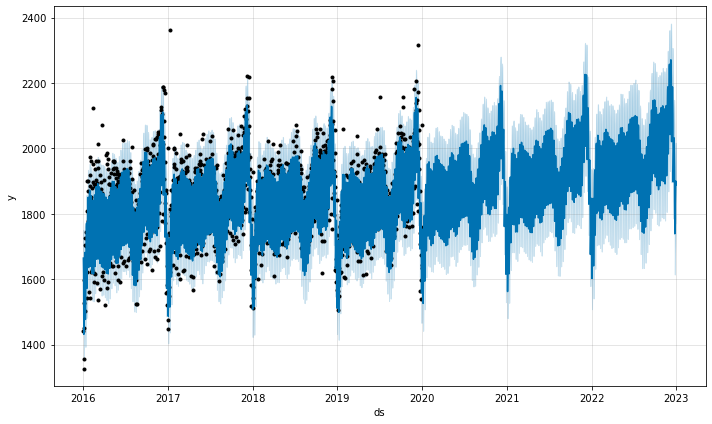

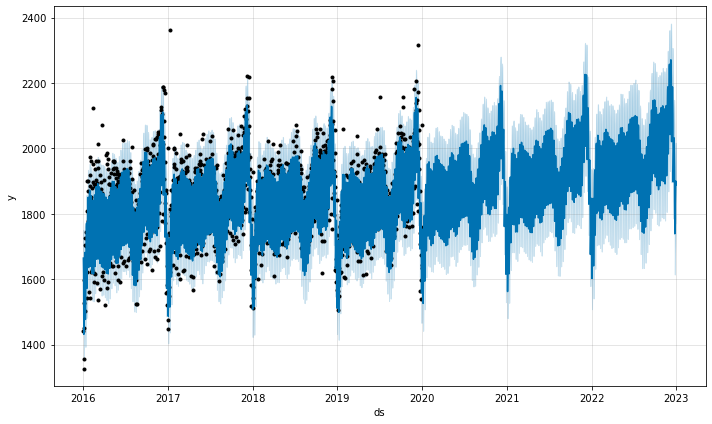

In [78]:
# Plot the forecast vs actuals
model.plot(forecast)

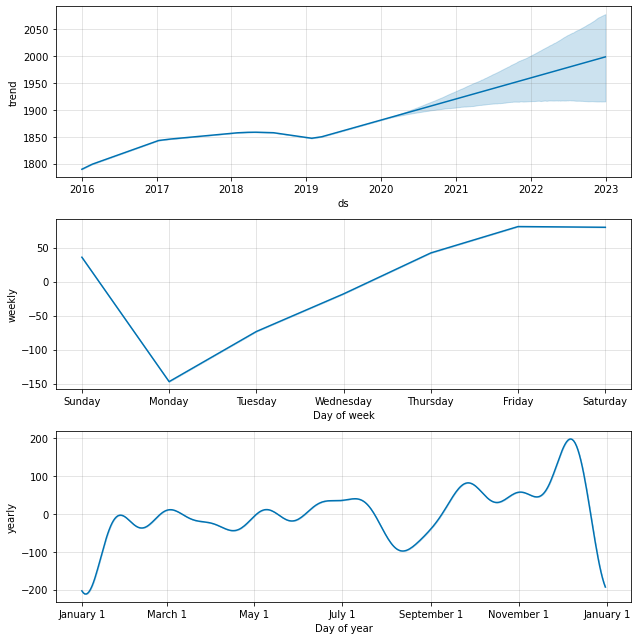

In [79]:
fig = model.plot_components(forecast)

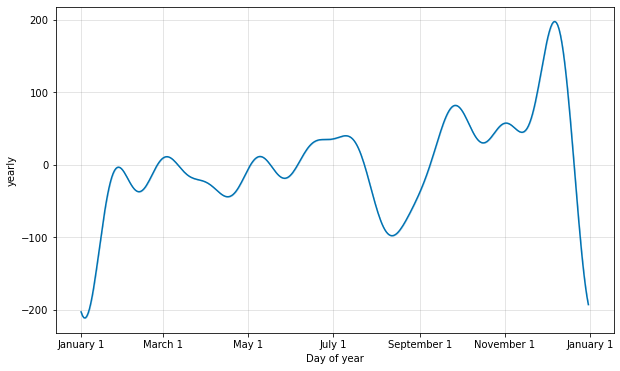

In [80]:
from fbprophet.plot import plot_yearly
plot_yearly(model)

In [ ]:
cv = cross_validation(model, initial='730 days', period='1 day', horizon='1 day')

INFO:fbprophet:Making 727 forecasts with cutoffs between 2018-01-01 00:00:00 and 2019-12-31 00:00:00


In [73]:
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-01-01,1716.344183,1668.288244,1765.429684,1843.571839,2018-12-31
1,2020-01-01,1705.980222,1642.268254,1762.772532,2072.401077,2019-12-31
